# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Loading crop and fertilizer data

In [3]:
crop = pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/data/main/Crop_recommendation.csv")
fertilizer = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/data/main/Fertilizer%20Prediction.csv')

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Renaming Columns

In [4]:
fertilizer.columns  = fertilizer.columns.str.lower()
fertilizer.rename({'humidity ': 'humidity'}, axis = 1, inplace = True)

In [5]:
fertilizer.head()

,temparature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous,fertilizer name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
pd.options.display.float_format = '{:,.0f}'.format

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Checking Missing values

In [8]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
crop.duplicated().sum()

0

# Descriptive Statistics

In [10]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,"2,200","2,200","2,200","2,200","2,200","2,200","2,200"
mean,51,53,48,26,71,6,103
std,37,33,51,5,22,1,55
min,0,5,5,9,14,4,20
25%,21,28,20,23,60,6,65
50%,37,51,32,26,80,6,95
75%,84,68,49,29,90,7,124
max,140,145,205,44,100,10,299


In [11]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   temparature      99 non-null     int64 
 1   humidity         99 non-null     int64 
 2   moisture         99 non-null     int64 
 3   soil type        99 non-null     object
 4   crop type        99 non-null     object
 5   nitrogen         99 non-null     int64 
 6   potassium        99 non-null     int64 
 7   phosphorous      99 non-null     int64 
 8   fertilizer name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [12]:
fertilizer.isna().sum()

temparature        0
humidity           0
moisture           0
soil type          0
crop type          0
nitrogen           0
potassium          0
phosphorous        0
fertilizer name    0
dtype: int64

In [13]:
fertilizer.duplicated().sum()

0

In [14]:
fertilizer.describe()

,temparature,humidity,moisture,nitrogen,potassium,phosphorous
count,99,99,99,99,99,99
mean,30,59,43,19,3,19
std,4,6,11,12,6,13
min,25,50,25,4,0,0
25%,28,54,34,10,0,9
50%,30,60,41,13,0,19
75%,33,64,50,24,8,30
max,38,72,65,42,19,42


# Data preprocessing

In [15]:


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Fit the label encoder and transform the data
crop['label'] = label_encoder.fit_transform(crop['label'])

In [16]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,21,82,7,203,20
1,85,58,41,22,80,7,227,20
2,60,55,44,23,82,8,264,20
3,74,35,40,26,80,7,243,20
4,78,42,42,20,82,8,263,20


In [17]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,21,82,7,203,20
1,85,58,41,22,80,7,227,20
2,60,55,44,23,82,8,264,20
3,74,35,40,26,80,7,243,20
4,78,42,42,20,82,8,263,20


# Correlation Matrix

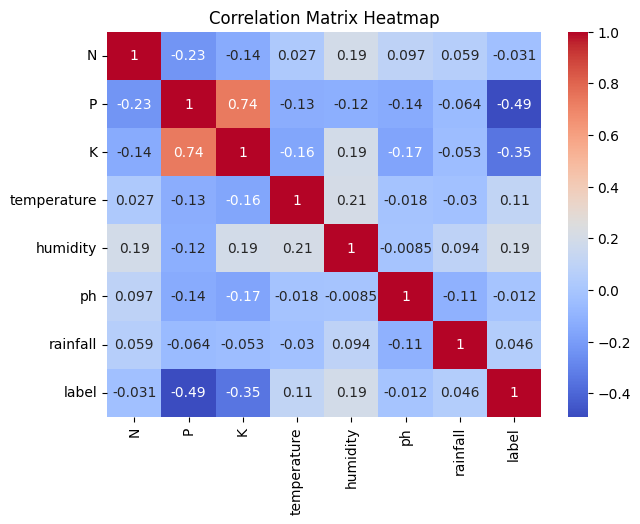

In [18]:
# 3. Correlation matrix heatmap
corr_matrix = crop.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Saving clean data

In [19]:
crop.to_csv('crop_cleaned.csv', index = False)
fertilizer.to_csv('fertilizer_cleaned.csv', index = False)

# Crop Recommendation

# Algorithms

## Logistic Regression

In [20]:
# Features
X = crop.drop('label', axis = 1).values
# Target
y = crop['label'].values

In [21]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

l_reg = LogisticRegression()

l_reg.fit(X_train, y_train)

y_pred = l_reg.predict(X_test)

accuracy = l_reg.score(X_test, y_test)

print(f'Logistic Regression Accuracy:{round(accuracy*100, 2)}%')

Logistic Regression Accuracy:94.55%


C:\Users\Mahbub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest Classifier

In [22]:



# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=25)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 99.32%


## Decision Tree Classifier

In [23]:

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 98.64%


## K - Nearest Neighbors

In [24]:

# Create a KNN classifier with k=3 (you can adjust the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 96.59%


## Support Vector Machine

In [27]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=25)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 97.95%


# Fertilizer Prediction

<Axes: xlabel='fertilizer name', ylabel='count'>

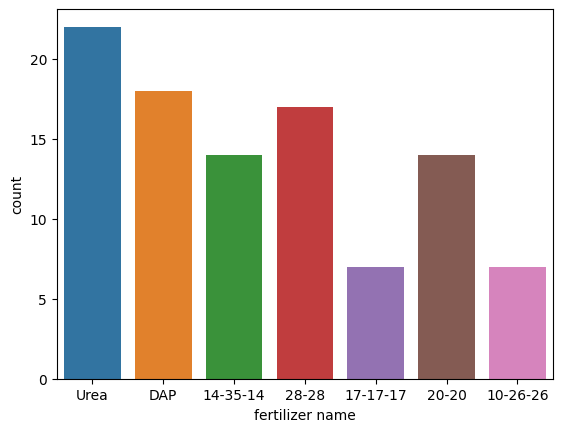

In [28]:
sns.countplot(data= fertilizer,x='fertilizer name')

In [29]:
fertilizer['soil type'].value_counts()

soil type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [30]:
fertilizer['crop type'].value_counts()

crop type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

In [31]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11
    
}

In [32]:
fertilizer['soil_num']=fertilizer['soil type'].map(soil_dict)
fertilizer['crop_num']=fertilizer['crop type'].map(crop_dict)

In [33]:
# Use the map function to replace values in the 'Category' column
fertilizer['soil_num'] = fertilizer['soil type'].map(soil_dict)

In [34]:
fertilizer.head()

,temparature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous,fertilizer name,soil_num,crop_num
0,26,52,38,Sandy,Maize,37,0,0,Urea,2,11
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,1,1
2,34,65,62,Black,Cotton,7,9,30,14-35-14,4,2
3,32,62,34,Red,Tobacco,22,0,20,28-28,5,7
4,28,54,46,Clayey,Paddy,35,0,0,Urea,3,4


In [35]:
fertilizer=fertilizer.drop(['soil type','crop type'],axis=1)
fertilizer.head()

,temparature,humidity,moisture,nitrogen,potassium,phosphorous,fertilizer name,soil_num,crop_num
0,26,52,38,37,0,0,Urea,2,11
1,29,52,45,12,0,36,DAP,1,1
2,34,65,62,7,9,30,14-35-14,4,2
3,32,62,34,22,0,20,28-28,5,7
4,28,54,46,35,0,0,Urea,3,4


In [36]:
X=fertilizer.drop(['fertilizer name'],axis=1)
y=fertilizer['fertilizer name']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

In [38]:
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (79, 8)
Testing data shape: (20, 8)


In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = log_reg.score(X_test, y_test)
accuracy

C:\Users\Mahbub\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

## Random Forest classifier

In [43]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=25)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 95.00%


## Decision Tree classifier

In [44]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


## K-Nearest Neighbors classifier

In [45]:
# Create a KNN classifier with k=9
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 85.00%


## Support Vector Machine

In [46]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=25)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%
